In [37]:
import logging

import matplotlib.pyplot as plt
import numpy as np
from pylbm import lbm
from scipy.optimize import curve_fit

In [46]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

epochs = 1001
eps = 0.01
omegas = np.arange(0.1, 1.51, 0.2).round(decimals=1)
omega = 0.5
i_dim, j_dim = 60, 50
x = np.arange(i_dim)
y = np.arange(j_dim)
X, Y = np.meshgrid(x, y)

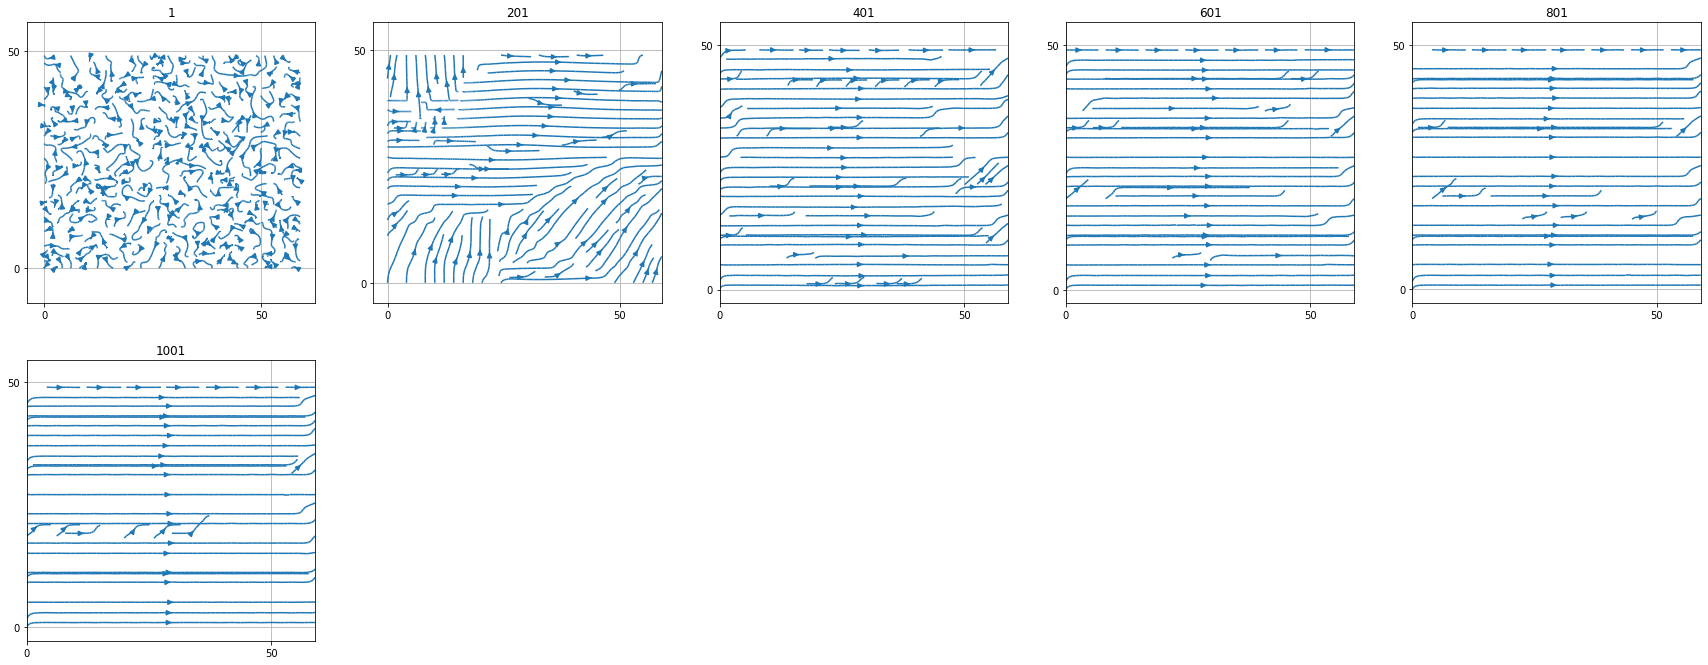

In [47]:
fig = plt.figure(figsize=(30,30))
# fig.suptitle("Lid Driven Cavity, lattice dimensions: ({} * {}), omega: {}, lid velocity = {}, steps: {}, Re: {}".format(width, length, omega, lid_vel, max_iter, re), fontsize="x-large")
# plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

# initial_time = time.time()
i = 1

r_ij = lbm.rho_init(i_dim=i_dim, j_dim=j_dim, r_mean=1.0, eps=0.1)
u_aij = lbm.local_avg_velocity_init(i_dim=i_dim, j_dim=j_dim, u_mean=0.0, eps=0.1)
f_cij = lbm.f_eq(u_aij=u_aij, r_ij=r_ij)

for t in range(epochs):
    
    f_cij = lbm.stream(f_cij=f_cij)
    f_cij, u_aij = lbm.collision(f_cij=f_cij, omega=omega)
    
    if t%200 == 0:
        # sys.stdout.write('iteration {}/{}\n'.format(t+1, max_iter))
        ax = plt.subplot(5,5,i)
        ax.set_xticks(np.arange(0, i_dim+1, 50))
        ax.set_yticks(np.arange(0, j_dim+1, 50))
        ax.grid(True)
        ax.axis("equal")
        ax.streamplot(np.arange(i_dim), np.arange(j_dim), u_aij[0,:,:].T, u_aij[1,:,:].T)
        ax.set_title(t+1)
        i+=1   
# elapsed_time = time.time() - initial_time

# print("elapsed time: ", elapsed_time)

plt.show()
# plt.savefig("milestone_%d_%d_%d_%.1f_%d_final.png" %(6, width, length, omega, max_iter))
# functions.plot_velocity(u, steps = max_iter, milestone=6, re = re, lid_vel=lid_vel, omega = omega)

# Reynoldsnumber
Divides the stable and unstable purturbations like turbulance.

If larger than 1 the system could show instability and turbulance.

For sliding lid in most work choose a reynoldsnumber ~1000. 

- Gives idea of what our outcome should look like.
- use 300 grid points as $R_e = 340/10 * l = 3.4 * 300 = 1000$ (theoretically derived with certrain omega)

Re is indicator that I am in the flow regime where simulation conforms to "normal" circumstances


# Diffusion constant phi

Set to 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
phi = np.zeros(100)
phi[49] = 1.
D = 1.0
dx = 1.
dt = 0.1
phi0 = phi

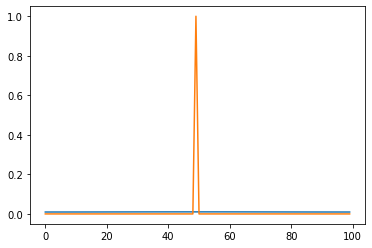

In [33]:
for i in range (10000):
    phi = phi + D*dt/dx**2*(np.roll(phi,1)-2.*phi+np.roll(phi,-1))
plt.plot(phi)
plt.plot(phi0)

Function still retains Gausian like distribution, but its super low.